# Data Import

In [214]:
import pandas as pd
df_trans = pd.read_excel("/Users/anupamsinha/Documents/Summer_Project/KPMG/KPMG_VI_New_raw_data_update_final.xlsx",sheet_name = 'Transactions')
df_demo = pd.read_excel("/Users/anupamsinha/Documents/Summer_Project/KPMG/KPMG_VI_New_raw_data_update_final.xlsx",sheet_name = 'CustomerDemographic')

In [215]:
df_demo.columns

Index(['customer_id', 'first_name', 'last_name', 'gender',
       'past_3_years_bike_related_purchases', 'DOB', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'default', 'owns_car', 'tenure'],
      dtype='object')

In [216]:
df_trans_sub = df_trans[['customer_id','list_price']]

In [217]:
df_trans_sub = df_trans_sub.groupby('customer_id').sum().reset_index()

In [218]:
df_trans_sub.head(5)

,customer_id,list_price
0,1,9084.45
1,2,4149.07
2,3,9888.23
3,4,1047.72
4,5,5903.20


# Data Merging with Relevant Columns

In [219]:
df_merged = pd.merge(df_demo,df_trans_sub, on = 'customer_id', how = 'inner')

In [220]:
df_merged.head(6)

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure,list_price
0,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0,9084.45
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0,4149.07
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15.0,9888.23
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0,1047.72
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.0,5903.20
5,6,Curr,Duckhouse,Male,35,1966-09-16,NaN,Retail,High Net Worth,N,ðµ ð ð ð,Yes,13.0,5931.69


# Exploratory Data Analysis

In [221]:
from datetime import date 
  
def calculateAge(born): 
    today = date.today() 
    try:  
        birthday = born.replace(year = today.year) 
  
    # raised when birth date is February 29 
    # and the current year is not a leap year 
    except ValueError:  
        birthday = born.replace(year = today.year, 
                  month = born.month + 1, day = 1) 
  
    if birthday > today: 
        return today.year - born.year - 1
    else: 
        return today.year - born.year 

In [222]:
df_merged['age'] = df_merged['DOB'].apply(lambda x: calculateAge(x))

In [223]:
#mode calculation forcategory, mode found here is Female
mode = df_merged['gender'].mode()

In [224]:
#Replacing U with mode of the column
df_merged.loc[(df_merged.gender == 'U'),'gender']='Female'

In [225]:
df_merged['gender'].value_counts()

Female    1837
Male      1656
Name: gender, dtype: int64

In [226]:
df_merged['tenure'].fillna(df_merged['tenure'].mean(), inplace=True)

In [227]:
df_merged.head(5)

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure,list_price,age
0,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0,9084.45,66.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0,4149.07,39.0
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15.0,9888.23,66.0
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0,1047.72,58.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.0,5903.20,43.0


# Variable Analysis

In [228]:
df_merged.describe()

,customer_id,past_3_years_bike_related_purchases,tenure,list_price,age
count,3493.000000,3493.000000,3493.000000,3493.000000,3417.000000
mean,1749.916118,48.806470,10.682470,6342.705142,42.297337
std,1010.520804,28.596449,5.614182,2958.430492,12.795064
min,1.000000,0.000000,1.000000,60.340000,18.000000
25%,876.000000,24.000000,6.000000,4201.570000,33.000000
50%,1750.000000,48.000000,10.682470,6029.250000,42.000000
75%,2624.000000,73.000000,15.000000,8210.100000,52.000000
max,3500.000000,99.000000,22.000000,19071.320000,176.000000


In [229]:
import seaborn as sns

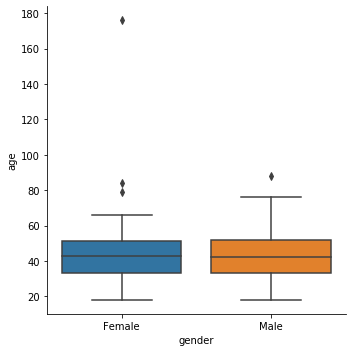

In [230]:
#outlier analysis
sns.catplot (x='gender', y= 'age',kind='box', data=df_merged)

In [231]:
Q1= df_merged['age'].quantile(0.25)
Q3= df_merged['age'].quantile(0.75)
IQR=Q3-Q1
print(Q1)
print(Q3)
print(IQR)
Lower_Whisker = Q1-1.5*IQR
Upper_Whisker = Q3+1.5*IQR
print(Lower_Whisker, Upper_Whisker)

33.0
52.0
19.0
4.5 80.5


In [232]:
df_merged.shape

(3493, 15)

In [233]:
df_merged = df_merged[df_merged['age']< Upper_Whisker]

In [234]:
df_merged.shape

(3414, 15)

In [235]:
df_merged['age'].fillna(df_merged['age'].mean(), inplace=True)

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [236]:
df_merged.describe()

,customer_id,past_3_years_bike_related_purchases,tenure,list_price,age
count,3414.000000,3414.000000,3414.000000,3414.000000,3414.000000
mean,1749.615114,48.975103,10.682777,6328.003503,42.232572
std,1010.472015,28.646818,5.675146,2955.228626,12.549665
min,1.000000,0.000000,1.000000,60.340000,18.000000
25%,875.250000,24.000000,6.000000,4191.650000,33.000000
50%,1749.500000,48.000000,11.000000,6018.320000,42.000000
75%,2622.750000,73.000000,15.000000,8188.552500,52.000000
max,3500.000000,99.000000,22.000000,19071.320000,79.000000


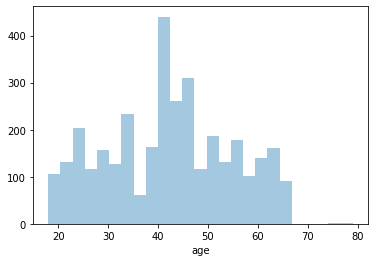

In [237]:
sns.distplot(df_merged['age'], kde=False, bins=25);


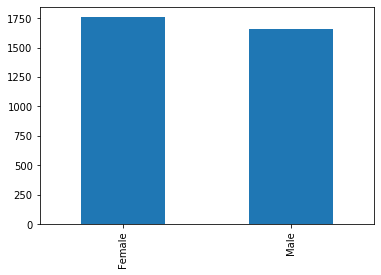

In [238]:
df_merged['gender'].value_counts().plot.bar()

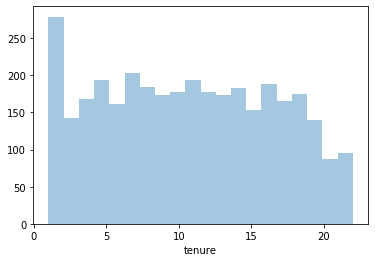

In [239]:
sns.distplot(df_merged['tenure'], kde=False, bins=20);

In [240]:
import matplotlib.pyplot as plt
%matplotlib inline


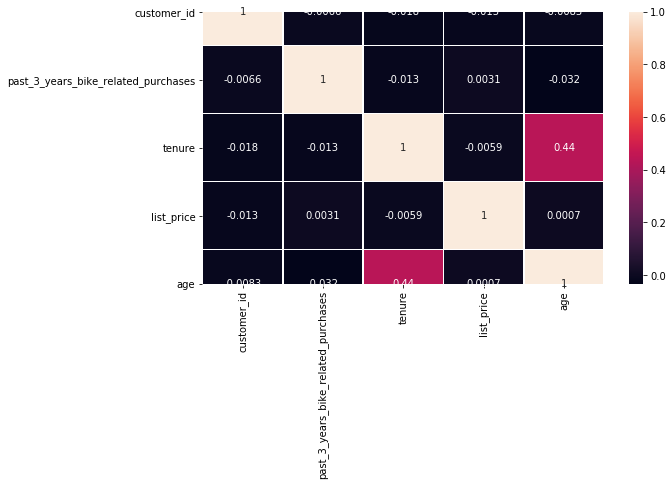

In [241]:
plt.figure(figsize=(9,5))
sns.heatmap(df_merged.corr(), annot = True, linewidth = 0.5)

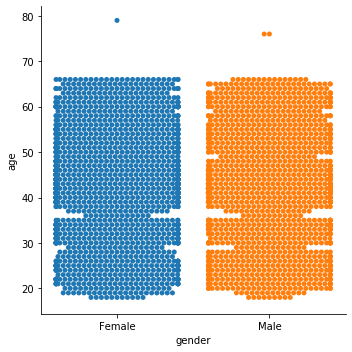

In [242]:
sns.catplot(x='gender', y='age',kind= 'swarm' , data=df_merged)

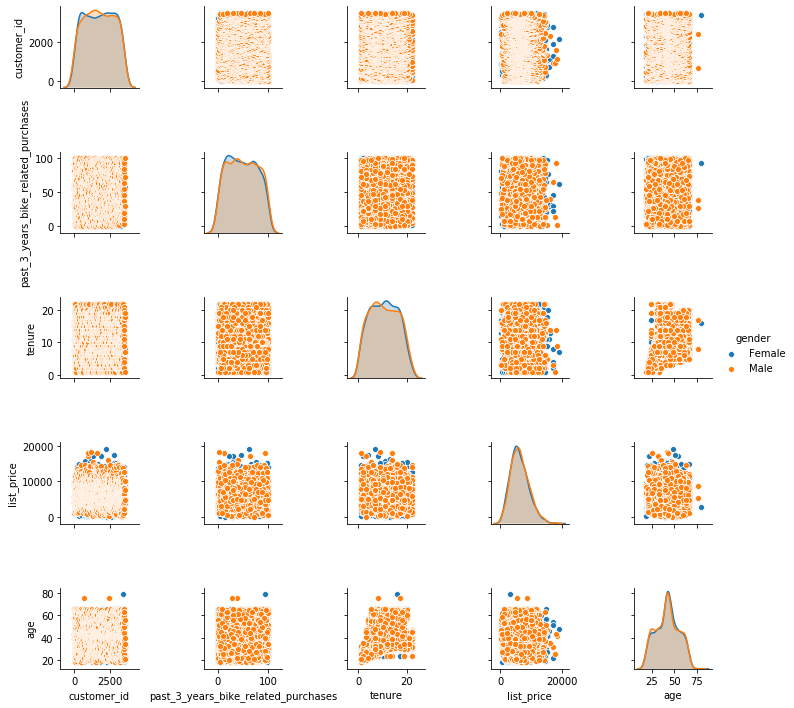

In [243]:
sns.pairplot(df_merged, hue = 'gender', height =2)

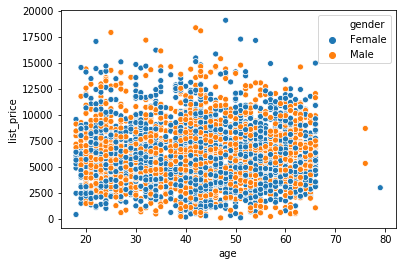

In [244]:
sns.scatterplot(x='age',y='list_price', hue = 'gender' , data =df_merged)

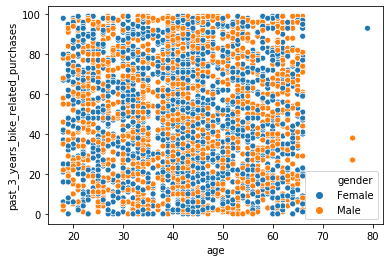

In [245]:
sns.scatterplot(x='age',y='past_3_years_bike_related_purchases', hue = 'gender' , data =df_merged)

In [246]:
df_merged.owns_car.value_counts()

Yes    1726
No     1688
Name: owns_car, dtype: int64

In [247]:
df_merged.dtypes

customer_id                                     int64
first_name                                     object
last_name                                      object
gender                                         object
past_3_years_bike_related_purchases             int64
DOB                                    datetime64[ns]
job_title                                      object
job_industry_category                          object
wealth_segment                                 object
deceased_indicator                             object
default                                        object
owns_car                                       object
tenure                                        float64
list_price                                    float64
age                                           float64
dtype: object

In [248]:
df_cleaned = df_merged.drop(['first_name','last_name','DOB','job_title','job_industry_category','deceased_indicator','deceased_indicator','default'],axis=1)

In [249]:
df_cleaned = pd.get_dummies(df_cleaned)

In [250]:
df_cleaned.head(7)

,customer_id,past_3_years_bike_related_purchases,tenure,list_price,age,gender_Female,gender_Male,wealth_segment_Affluent Customer,wealth_segment_High Net Worth,wealth_segment_Mass Customer,owns_car_No,owns_car_Yes
0,1,93,11.0,9084.45,66.0,1,0,0,0,1,0,1
1,2,81,16.0,4149.07,39.0,0,1,0,0,1,0,1
2,3,61,15.0,9888.23,66.0,0,1,0,0,1,0,1
3,4,33,7.0,1047.72,58.0,0,1,0,0,1,1,0
4,5,56,8.0,5903.20,43.0,1,0,1,0,0,0,1
5,6,35,13.0,5931.69,53.0,0,1,0,1,0,0,1
6,7,6,11.0,995.38,44.0,1,0,1,0,0,0,1


# Data Modeling

In [251]:
df_model = df_cleaned.drop(['customer_id'],axis=1)

In [252]:
df_model.head(5)

,past_3_years_bike_related_purchases,tenure,list_price,age,gender_Female,gender_Male,wealth_segment_Affluent Customer,wealth_segment_High Net Worth,wealth_segment_Mass Customer,owns_car_No,owns_car_Yes
0,93,11.0,9084.45,66.0,1,0,0,0,1,0,1
1,81,16.0,4149.07,39.0,0,1,0,0,1,0,1
2,61,15.0,9888.23,66.0,0,1,0,0,1,0,1
3,33,7.0,1047.72,58.0,0,1,0,0,1,1,0
4,56,8.0,5903.20,43.0,1,0,1,0,0,0,1


In [253]:
from sklearn.cluster import KMeans
wcss = []

In [254]:
for i in range(1,20):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(df_model)
    wcss.append(kmeans.inertia_)

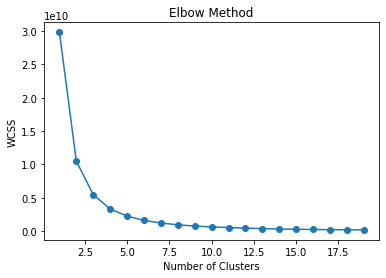

In [255]:
plt.plot(range(1,20),wcss, marker = 'o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [256]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state =42)
y_kmeans = kmeans.fit_predict(df_model)

In [257]:
print(y_kmeans)

[2 3 2 ... 0 2 0]


In [258]:
df_model.head(8)

,past_3_years_bike_related_purchases,tenure,list_price,age,gender_Female,gender_Male,wealth_segment_Affluent Customer,wealth_segment_High Net Worth,wealth_segment_Mass Customer,owns_car_No,owns_car_Yes
0,93,11.0,9084.45,66.0,1,0,0,0,1,0,1
1,81,16.0,4149.07,39.0,0,1,0,0,1,0,1
2,61,15.0,9888.23,66.0,0,1,0,0,1,0,1
3,33,7.0,1047.72,58.0,0,1,0,0,1,1,0
4,56,8.0,5903.20,43.0,1,0,1,0,0,0,1
5,35,13.0,5931.69,53.0,0,1,0,1,0,0,1
6,6,11.0,995.38,44.0,1,0,1,0,0,0,1
7,31,7.0,12024.76,58.0,0,1,0,0,1,1,0


In [259]:
from sklearn.metrics import davies_bouldin_score 

In [260]:
labels = kmeans.labels_ 

In [261]:
print(davies_bouldin_score(df_model, labels))

0.55368577512549


In [275]:
df_model['cluster'] = y_kmeans
df_model.head(8)

,past_3_years_bike_related_purchases,tenure,list_price,age,gender_Female,gender_Male,wealth_segment_Affluent Customer,wealth_segment_High Net Worth,wealth_segment_Mass Customer,owns_car_No,owns_car_Yes,clusters,cluster
0,93,11.0,9084.45,66.0,1,0,0,0,1,0,1,2,2
1,81,16.0,4149.07,39.0,0,1,0,0,1,0,1,3,3
2,61,15.0,9888.23,66.0,0,1,0,0,1,0,1,2,2
3,33,7.0,1047.72,58.0,0,1,0,0,1,1,0,3,3
4,56,8.0,5903.20,43.0,1,0,1,0,0,0,1,0,0
5,35,13.0,5931.69,53.0,0,1,0,1,0,0,1,0,0
6,6,11.0,995.38,44.0,1,0,1,0,0,0,1,3,3
7,31,7.0,12024.76,58.0,0,1,0,0,1,1,0,1,1


In [276]:
X = df_model.iloc[:,[2,3]].values

Text(0, 0.5, 'Age')

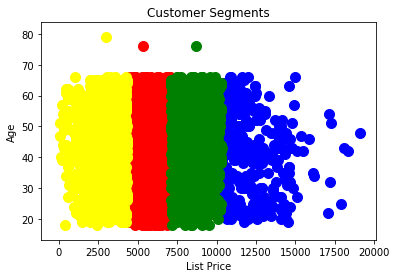

In [277]:
plt.scatter(X[y_kmeans == 0,0], X[y_kmeans == 0,1], s=100, c='red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1,0], X[y_kmeans == 1,1], s=100, c='blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2,0], X[y_kmeans == 2,1], s=100, c='green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3,0], X[y_kmeans == 3,1], s=100, c='yellow', label = 'Cluster 4')
plt.title('Customer Segments')
plt.xlabel('List Price')
plt.ylabel('Age')

In [278]:
df_model.head()

,past_3_years_bike_related_purchases,tenure,list_price,age,gender_Female,gender_Male,wealth_segment_Affluent Customer,wealth_segment_High Net Worth,wealth_segment_Mass Customer,owns_car_No,owns_car_Yes,clusters,cluster
0,93,11.0,9084.45,66.0,1,0,0,0,1,0,1,2,2
1,81,16.0,4149.07,39.0,0,1,0,0,1,0,1,3,3
2,61,15.0,9888.23,66.0,0,1,0,0,1,0,1,2,2
3,33,7.0,1047.72,58.0,0,1,0,0,1,1,0,3,3
4,56,8.0,5903.20,43.0,1,0,1,0,0,0,1,0,0


In [279]:
best_seg = df_model[['list_price','cluster']]
best_seg.groupby('cluster').mean().reset_index()

,cluster,list_price
0,0,5691.417096
1,1,12139.452090
2,2,8508.560851
3,3,2947.453169


In [285]:
cluster_2 = df_model[df_model['cluster']==1]

In [286]:
cluster_2[['tenure','list_price','age','past_3_years_bike_related_purchases']].mean()

tenure                                    10.752239
list_price                             12139.452090
age                                       41.871642
past_3_years_bike_related_purchases       49.391045
dtype: float64

In [287]:
cluster_2.dtypes

past_3_years_bike_related_purchases      int64
tenure                                 float64
list_price                             float64
age                                    float64
gender_Female                            uint8
gender_Male                              uint8
wealth_segment_Affluent Customer         uint8
wealth_segment_High Net Worth            uint8
wealth_segment_Mass Customer             uint8
owns_car_No                              uint8
owns_car_Yes                             uint8
clusters                                 int32
cluster                                  int32
dtype: object

In [289]:
cluster_2[['gender_Female','gender_Male','wealth_segment_Affluent Customer','wealth_segment_High Net Worth','wealth_segment_Mass Customer','owns_car_No','owns_car_Yes']].sum()/335* 100 

gender_Female                       50.149254
gender_Male                         49.850746
wealth_segment_Affluent Customer    24.179104
wealth_segment_High Net Worth       24.776119
wealth_segment_Mass Customer        51.044776
owns_car_No                         51.044776
owns_car_Yes                        48.955224
dtype: float64